In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

we collected data from website : Car24

In [231]:
#loading data
data = pd.read_csv ("C:/Users/Admin/Desktop/result.csv")
data

,Unnamed: 0,Unnamed: 0.1,Car,History,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
0,0,0,2016 Renault Kwid 1.0 RXT MANUAL,Non-Accidental,"20,445 km",August 2016,1st Owner,Petrol,MANUAL,Fixed Price,hyderabad
1,1,1,2018 Volkswagen Ameo HIGHLINE PLUS 1.0 MANUAL,Non-Accidental,"65,235 km",July 2018,1st Owner,Petrol,MANUAL,"Fixed Price\n₹3,33,899",hyderabad
2,2,2,2017 Skoda Octavia Style 1.4 TSI MT MANUAL,Non-Accidental,"47,264 km",July 2017,1st Owner,Petrol,MANUAL,"Fixed Price\n₹6,21,899",hyderabad
3,3,3,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,Non-Accidental,"1,03,354 km",December 2016,1st Owner,Petrol,MANUAL,"Fixed Price\n₹13,05,499",hyderabad
4,4,4,2015 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,"65,571 km",November 2015,2nd Owner,Petrol,AUTOMATIC,"Fixed Price\n₹6,21,899",hyderabad
...,...,...,...,...,...,...,...,...,...,...,...
257,15,15,2016 Maruti Ertiga ZDI SHVS MANUAL,Non-Accidental,"66,982 km",July 2016,2nd Owner,Diesel,MANUAL,"Fixed Price\n₹8,16,999",Mumbai
258,16,16,2017 Hyundai i20 Active 1.2 SX MANUAL,Non-Accidental,"12,910 km",January 2017,1st Owner,Petrol,MANUAL,"Fixed Price\n₹6,48,699",Mumbai
259,17,17,2017 Maruti Vitara Brezza VDI OPT MANUAL,Non-Accidental,"46,304 km",May 2017,1st Owner,Diesel,MANUAL,"Fixed Price\n₹7,45,199",Mumbai
260,18,18,2015 Maruti Ciaz ZXI PLUS MANUAL,Non-Accidental,"23,382 km",January 2015,1st Owner,Petrol,MANUAL,"Fixed Price\n₹6,55,199",Mumbai


In [232]:
data['Price']=data['Price'].str.split('\n', expand=True)[1]

In [233]:
data['Price']

0            None
1       ₹3,33,899
2       ₹6,21,899
3      ₹13,05,499
4       ₹6,21,899
          ...    
257     ₹8,16,999
258     ₹6,48,699
259     ₹7,45,199
260     ₹6,55,199
261    ₹13,78,099
Name: Price, Length: 262, dtype: object

In [234]:
#Splitted by space and removed kms
data['KM']=data['KM'].str.split(' ',expand=True)[0]

In [235]:
car1=data.assign(Price=data['Price'].str.replace(r'₹', ''))

In [236]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     262 non-null    int64 
 1   Unnamed: 0.1   262 non-null    int64 
 2   Car            262 non-null    object
 3   History        262 non-null    object
 4   KM             262 non-null    object
 5   Year_purchase  262 non-null    object
 6   Owner          262 non-null    object
 7   fuel           262 non-null    object
 8   Transmission   257 non-null    object
 9   Price          256 non-null    object
 10  Location       262 non-null    object
dtypes: int64(2), object(9)
memory usage: 22.6+ KB


In [237]:
car=car1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [238]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car            262 non-null    object
 1   History        262 non-null    object
 2   KM             262 non-null    object
 3   Year_purchase  262 non-null    object
 4   Owner          262 non-null    object
 5   fuel           262 non-null    object
 6   Transmission   257 non-null    object
 7   Price          256 non-null    object
 8   Location       262 non-null    object
dtypes: object(9)
memory usage: 18.5+ KB


In [239]:
car.dropna()

,Car,History,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
1,2018 Volkswagen Ameo HIGHLINE PLUS 1.0 MANUAL,Non-Accidental,"65,235",July 2018,1st Owner,Petrol,MANUAL,"3,33,899",hyderabad
2,2017 Skoda Octavia Style 1.4 TSI MT MANUAL,Non-Accidental,"47,264",July 2017,1st Owner,Petrol,MANUAL,"6,21,899",hyderabad
3,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,Non-Accidental,"1,03,354",December 2016,1st Owner,Petrol,MANUAL,"13,05,499",hyderabad
4,2015 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,"65,571",November 2015,2nd Owner,Petrol,AUTOMATIC,"6,21,899",hyderabad
5,2017 Maruti Baleno DELTA 1.2 K12 MANUAL,Non-Accidental,"22,876",April 2017,1st Owner,Petrol,MANUAL,"5,24,199",hyderabad
...,...,...,...,...,...,...,...,...,...
257,2016 Maruti Ertiga ZDI SHVS MANUAL,Non-Accidental,"66,982",July 2016,2nd Owner,Diesel,MANUAL,"8,16,999",Mumbai
258,2017 Hyundai i20 Active 1.2 SX MANUAL,Non-Accidental,"12,910",January 2017,1st Owner,Petrol,MANUAL,"6,48,699",Mumbai
259,2017 Maruti Vitara Brezza VDI OPT MANUAL,Non-Accidental,"46,304",May 2017,1st Owner,Diesel,MANUAL,"7,45,199",Mumbai
260,2015 Maruti Ciaz ZXI PLUS MANUAL,Non-Accidental,"23,382",January 2015,1st Owner,Petrol,MANUAL,"6,55,199",Mumbai


In [240]:
car.shape

(262, 9)

In [241]:
car['Year_purchase'] = pd.DatetimeIndex(car['Year_purchase']).year

In [242]:
car

,Car,History,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
0,2016 Renault Kwid 1.0 RXT MANUAL,Non-Accidental,"20,445",2016,1st Owner,Petrol,MANUAL,None,hyderabad
1,2018 Volkswagen Ameo HIGHLINE PLUS 1.0 MANUAL,Non-Accidental,"65,235",2018,1st Owner,Petrol,MANUAL,"3,33,899",hyderabad
2,2017 Skoda Octavia Style 1.4 TSI MT MANUAL,Non-Accidental,"47,264",2017,1st Owner,Petrol,MANUAL,"6,21,899",hyderabad
3,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,Non-Accidental,"1,03,354",2016,1st Owner,Petrol,MANUAL,"13,05,499",hyderabad
4,2015 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,"65,571",2015,2nd Owner,Petrol,AUTOMATIC,"6,21,899",hyderabad
...,...,...,...,...,...,...,...,...,...
257,2016 Maruti Ertiga ZDI SHVS MANUAL,Non-Accidental,"66,982",2016,2nd Owner,Diesel,MANUAL,"8,16,999",Mumbai
258,2017 Hyundai i20 Active 1.2 SX MANUAL,Non-Accidental,"12,910",2017,1st Owner,Petrol,MANUAL,"6,48,699",Mumbai
259,2017 Maruti Vitara Brezza VDI OPT MANUAL,Non-Accidental,"46,304",2017,1st Owner,Diesel,MANUAL,"7,45,199",Mumbai
260,2015 Maruti Ciaz ZXI PLUS MANUAL,Non-Accidental,"23,382",2015,1st Owner,Petrol,MANUAL,"6,55,199",Mumbai


In [243]:
car['Car'].value_counts()

2015 Maruti Swift VDI ABS MANUAL                 5
2014 Maruti Swift VXI MANUAL                     5
2018 Maruti Alto K10 VXI MANUAL                  4
2019 Maruti Eeco 5 STR WITH AC PLUSHTR MANUAL    4
2016 Renault Kwid 1.0 RXT MANUAL                 4
                                                ..
2012 Ford Fiesta TITANIUM DIESEL MANUAL          1
2015 Hyundai Elite i20 ASTA 1.4 CRDI MANUAL      1
2018 Hyundai Verna 1.6 CRDI SX + AT AUTOMATIC    1
2013 Renault Duster 85 PS RXL OPT MANUAL         1
2018 Hyundai Grand i10 SPORTS 1.2 VTVT MANUAL    1
Name: Car, Length: 182, dtype: int64

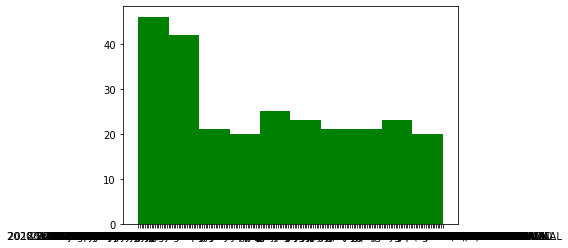

In [244]:
plt.hist(car['Car'],color='g')
figsize=(30,30)
plt.show()

The car type: for Maruti model the number is high..rest are in approx same number

In [245]:
car['History'].value_counts()

Non-Accidental    262
Name: History, dtype: int64

There is only one category in History: Non-Accidental, so can be dropped

In [246]:
car['Owner'].value_counts()

1st Owner    202
2nd Owner     54
3rd Owner      3
NAN            3
Name: Owner, dtype: int64

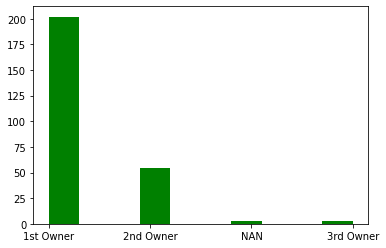

In [247]:
plt.hist(car['Owner'],color='g')
figsize=(30,30)
plt.show()

Mostly car are from 1st owner

In [248]:
car['fuel'].value_counts()

Petrol    144
Diesel    115
NAN         3
Name: fuel, dtype: int64

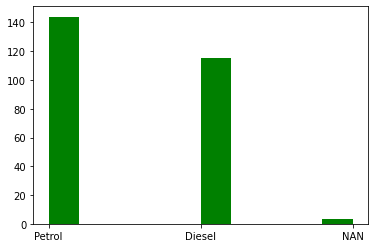

In [249]:
plt.hist(car['fuel'],color='g')
figsize=(30,30)
plt.show()

The number of petrol vehicle is more as compare to Diesel 

In [250]:
car['Transmission'].value_counts()

MANUAL       222
AUTOMATIC     31
NAN            4
Name: Transmission, dtype: int64

Maximum car as Manual transmission

In [251]:
car['Location'].value_counts()

hyderabad    122
Delhi        120
Mumbai        20
Name: Location, dtype: int64

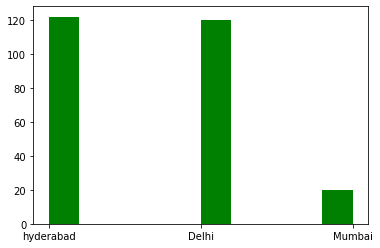

In [252]:
plt.hist(car['Location'],color='g')
figsize=(30,30)
plt.show()

Mostly car data is scrapped from hyderabad and Delhi.

In [253]:
car['Year_purchase']=2021-car['Year_purchase']
car['Year_purchase']

0      5
1      3
2      4
3      5
4      6
      ..
257    5
258    4
259    4
260    6
261    4
Name: Year_purchase, Length: 262, dtype: int64

In [254]:
car['Year_purchase'].value_counts()

4     41
6     39
5     38
3     32
7     31
2     22
8     21
1     13
9     13
10     6
0      3
11     3
Name: Year_purchase, dtype: int64

In [255]:
df=car.assign(Price=car['Price'].str.replace(r',', ''))

In [256]:
df['Price']

0         None
1       333899
2       621899
3      1305499
4       621899
        ...   
257     816999
258     648699
259     745199
260     655199
261    1378099
Name: Price, Length: 262, dtype: object

In [257]:
df['Price']=pd.to_numeric(df['Price'])

In [258]:
df['Price'] = df['Price'].div(100000).round(2)

In [259]:
df

,Car,History,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
0,2016 Renault Kwid 1.0 RXT MANUAL,Non-Accidental,"20,445",5,1st Owner,Petrol,MANUAL,NaN,hyderabad
1,2018 Volkswagen Ameo HIGHLINE PLUS 1.0 MANUAL,Non-Accidental,"65,235",3,1st Owner,Petrol,MANUAL,3.34,hyderabad
2,2017 Skoda Octavia Style 1.4 TSI MT MANUAL,Non-Accidental,"47,264",4,1st Owner,Petrol,MANUAL,6.22,hyderabad
3,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,Non-Accidental,"1,03,354",5,1st Owner,Petrol,MANUAL,13.05,hyderabad
4,2015 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,"65,571",6,2nd Owner,Petrol,AUTOMATIC,6.22,hyderabad
...,...,...,...,...,...,...,...,...,...
257,2016 Maruti Ertiga ZDI SHVS MANUAL,Non-Accidental,"66,982",5,2nd Owner,Diesel,MANUAL,8.17,Mumbai
258,2017 Hyundai i20 Active 1.2 SX MANUAL,Non-Accidental,"12,910",4,1st Owner,Petrol,MANUAL,6.49,Mumbai
259,2017 Maruti Vitara Brezza VDI OPT MANUAL,Non-Accidental,"46,304",4,1st Owner,Diesel,MANUAL,7.45,Mumbai
260,2015 Maruti Ciaz ZXI PLUS MANUAL,Non-Accidental,"23,382",6,1st Owner,Petrol,MANUAL,6.55,Mumbai


In [260]:
df['KM']=df['KM'].str.replace(',','')

In [261]:
df

,Car,History,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
0,2016 Renault Kwid 1.0 RXT MANUAL,Non-Accidental,20445,5,1st Owner,Petrol,MANUAL,NaN,hyderabad
1,2018 Volkswagen Ameo HIGHLINE PLUS 1.0 MANUAL,Non-Accidental,65235,3,1st Owner,Petrol,MANUAL,3.34,hyderabad
2,2017 Skoda Octavia Style 1.4 TSI MT MANUAL,Non-Accidental,47264,4,1st Owner,Petrol,MANUAL,6.22,hyderabad
3,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,Non-Accidental,103354,5,1st Owner,Petrol,MANUAL,13.05,hyderabad
4,2015 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,65571,6,2nd Owner,Petrol,AUTOMATIC,6.22,hyderabad
...,...,...,...,...,...,...,...,...,...
257,2016 Maruti Ertiga ZDI SHVS MANUAL,Non-Accidental,66982,5,2nd Owner,Diesel,MANUAL,8.17,Mumbai
258,2017 Hyundai i20 Active 1.2 SX MANUAL,Non-Accidental,12910,4,1st Owner,Petrol,MANUAL,6.49,Mumbai
259,2017 Maruti Vitara Brezza VDI OPT MANUAL,Non-Accidental,46304,4,1st Owner,Diesel,MANUAL,7.45,Mumbai
260,2015 Maruti Ciaz ZXI PLUS MANUAL,Non-Accidental,23382,6,1st Owner,Petrol,MANUAL,6.55,Mumbai


In [262]:
df.isnull().sum()

Car              0
History          0
KM               0
Year_purchase    0
Owner            0
fuel             0
Transmission     5
Price            6
Location         0
dtype: int64

In [263]:
df1=df.dropna()

In [264]:
df1.isnull().sum()

Car              0
History          0
KM               0
Year_purchase    0
Owner            0
fuel             0
Transmission     0
Price            0
Location         0
dtype: int64

In [265]:
df1

,Car,History,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
1,2018 Volkswagen Ameo HIGHLINE PLUS 1.0 MANUAL,Non-Accidental,65235,3,1st Owner,Petrol,MANUAL,3.34,hyderabad
2,2017 Skoda Octavia Style 1.4 TSI MT MANUAL,Non-Accidental,47264,4,1st Owner,Petrol,MANUAL,6.22,hyderabad
3,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,Non-Accidental,103354,5,1st Owner,Petrol,MANUAL,13.05,hyderabad
4,2015 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,65571,6,2nd Owner,Petrol,AUTOMATIC,6.22,hyderabad
5,2017 Maruti Baleno DELTA 1.2 K12 MANUAL,Non-Accidental,22876,4,1st Owner,Petrol,MANUAL,5.24,hyderabad
...,...,...,...,...,...,...,...,...,...
257,2016 Maruti Ertiga ZDI SHVS MANUAL,Non-Accidental,66982,5,2nd Owner,Diesel,MANUAL,8.17,Mumbai
258,2017 Hyundai i20 Active 1.2 SX MANUAL,Non-Accidental,12910,4,1st Owner,Petrol,MANUAL,6.49,Mumbai
259,2017 Maruti Vitara Brezza VDI OPT MANUAL,Non-Accidental,46304,4,1st Owner,Diesel,MANUAL,7.45,Mumbai
260,2015 Maruti Ciaz ZXI PLUS MANUAL,Non-Accidental,23382,6,1st Owner,Petrol,MANUAL,6.55,Mumbai


In [266]:
df2=df1.drop(['History'], axis = 1)

In [267]:
df2

,Car,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
1,2018 Volkswagen Ameo HIGHLINE PLUS 1.0 MANUAL,65235,3,1st Owner,Petrol,MANUAL,3.34,hyderabad
2,2017 Skoda Octavia Style 1.4 TSI MT MANUAL,47264,4,1st Owner,Petrol,MANUAL,6.22,hyderabad
3,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,103354,5,1st Owner,Petrol,MANUAL,13.05,hyderabad
4,2015 Honda Jazz 1.2 V AT AUTOMATIC,65571,6,2nd Owner,Petrol,AUTOMATIC,6.22,hyderabad
5,2017 Maruti Baleno DELTA 1.2 K12 MANUAL,22876,4,1st Owner,Petrol,MANUAL,5.24,hyderabad
...,...,...,...,...,...,...,...,...
257,2016 Maruti Ertiga ZDI SHVS MANUAL,66982,5,2nd Owner,Diesel,MANUAL,8.17,Mumbai
258,2017 Hyundai i20 Active 1.2 SX MANUAL,12910,4,1st Owner,Petrol,MANUAL,6.49,Mumbai
259,2017 Maruti Vitara Brezza VDI OPT MANUAL,46304,4,1st Owner,Diesel,MANUAL,7.45,Mumbai
260,2015 Maruti Ciaz ZXI PLUS MANUAL,23382,6,1st Owner,Petrol,MANUAL,6.55,Mumbai


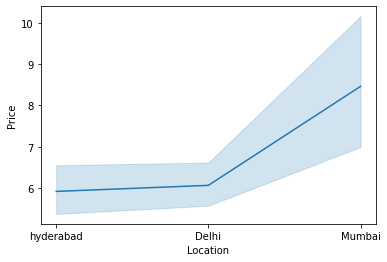

In [268]:
sns.lineplot(x="Location", y="Price",data=df2)
plt.show()

Price are high in mumbai 

In [269]:
df2['fuel']=df2['fuel'].replace('NAN', 'Diesel')

In [270]:
df2['fuel'].unique()

array(['Petrol', 'Diesel'], dtype=object)

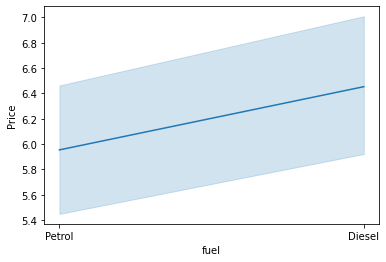

In [271]:
sns.lineplot(x="fuel", y="Price",data=df2)
plt.show()

Petrol vehicle are more in demand than diesel

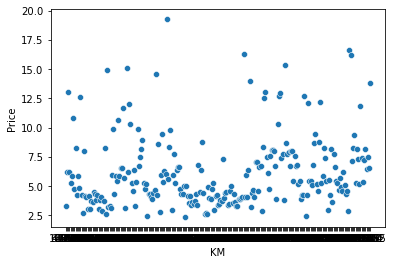

In [272]:
sns.scatterplot(x="KM", y="Price",data=df2)
plt.show()

In [273]:
df2['Owner']=df2['Owner'].replace('NAN', '3rd Owner')

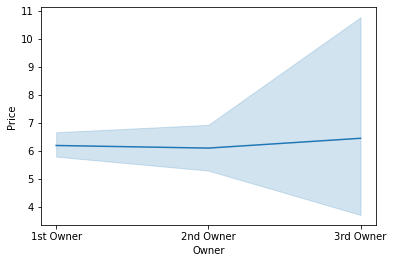

In [274]:
sns.lineplot(x="Owner", y="Price",data=df2)
plt.show()

In [275]:
df2['Transmission']=df2['Transmission'].replace('NAN', 'AUTOMATIC')

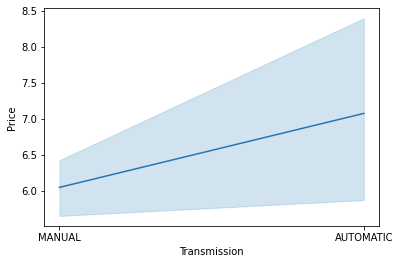

In [276]:
sns.lineplot(x="Transmission", y="Price",data=df2)
plt.show()

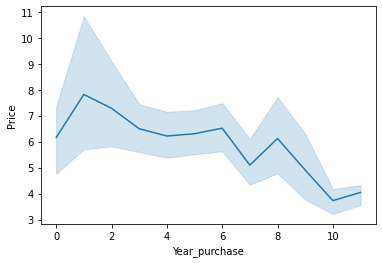

In [277]:
sns.lineplot(x="Year_purchase", y="Price",data=df2)
plt.show()

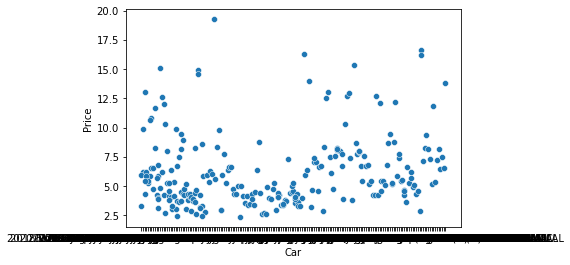

In [278]:
sns.scatterplot(x="Car", y="Price",data=df2)
plt.show()

In [279]:
df2.isnull().sum()

Car              0
KM               0
Year_purchase    0
Owner            0
fuel             0
Transmission     0
Price            0
Location         0
dtype: int64

In [280]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df2
le=LabelEncoder()
df_encoded['Location']=le.fit_transform(df_encoded['Location'])
print(df_encoded['Location'].value_counts())

0    118
2    114
1     19
Name: Location, dtype: int64


In [281]:
df_encoded['Car']=le.fit_transform(df_encoded['Car'])
print(df_encoded['Car'].value_counts())

73     5
45     5
96     4
159    4
88     3
      ..
83     1
82     1
81     1
80     1
0      1
Name: Car, Length: 177, dtype: int64


In [282]:
df_encoded['Owner']=le.fit_transform(df_encoded['Owner'])
print(df_encoded['Owner'].value_counts())

0    195
1     50
2      6
Name: Owner, dtype: int64


In [283]:
df_encoded['fuel']=le.fit_transform(df_encoded['fuel'])
print(df_encoded['fuel'].value_counts())

1    136
0    115
Name: fuel, dtype: int64


In [284]:
df_encoded['Location']=le.fit_transform(df_encoded['Location'])
print(df_encoded['Location'].value_counts())

0    118
2    114
1     19
Name: Location, dtype: int64


In [285]:
df_encoded['Car']=le.fit_transform(df_encoded['Car'])
print(df_encoded['Car'].value_counts())

73     5
45     5
96     4
159    4
88     3
      ..
83     1
82     1
81     1
80     1
0      1
Name: Car, Length: 177, dtype: int64


In [286]:
df_encoded['Transmission']=le.fit_transform(df_encoded['Transmission'])
print(df_encoded['Transmission'].value_counts())

1    218
0     33
Name: Transmission, dtype: int64


In [287]:
df_encoded.head()

,Car,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
1,152,65235,3,0,1,1,3.34,2
2,130,47264,4,0,1,1,6.22,2
3,88,103354,5,0,1,1,13.05,2
4,54,65571,6,1,1,0,6.22,2
5,118,22876,4,0,1,1,5.24,2


In [288]:
df_encoded.describe()

,Car,Year_purchase,Owner,fuel,Transmission,Price,Location
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,87.856574,5.139442,0.247012,0.541833,0.868526,6.182510,0.984064
std,51.584526,2.361457,0.484501,0.499242,0.338593,3.062169,0.963195
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.370000,0.000000
25%,45.000000,3.000000,0.000000,0.000000,1.000000,4.110000,0.000000
50%,88.000000,5.000000,0.000000,1.000000,1.000000,5.270000,1.000000
75%,133.500000,7.000000,0.000000,1.000000,1.000000,7.450000,2.000000
max,176.000000,11.000000,2.000000,1.000000,1.000000,19.260000,2.000000


<AxesSubplot:>

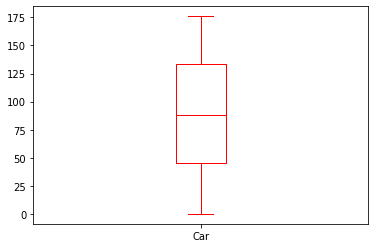

In [289]:
df_encoded['Car'].plot(kind='box',color='r')

In [290]:
df_encoded['KM']=pd.to_numeric(df_encoded['KM'])

<AxesSubplot:>

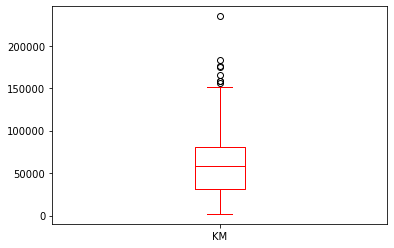

In [291]:
df_encoded['KM'].plot(kind='box',color='r')

KM can ave outliers, if the car is old so km driven would be more

In [292]:
df_encoded.corr()

,Car,KM,Year_purchase,Owner,fuel,Transmission,Price,Location
Car,1.000000,-0.306874,-0.619531,-0.110929,0.158506,-0.157272,0.131026,0.274961
KM,-0.306874,1.000000,0.359168,0.074407,-0.396840,0.038337,-0.011520,-0.137710
Year_purchase,-0.619531,0.359168,1.000000,0.176045,-0.162737,0.088055,-0.215383,-0.227636
Owner,-0.110929,0.074407,0.176045,1.000000,-0.042891,-0.240139,-0.002172,0.085611
fuel,0.158506,-0.396840,-0.162737,-0.042891,1.000000,-0.026491,-0.081298,0.442261
Transmission,-0.157272,0.038337,0.088055,-0.240139,-0.026491,1.000000,-0.113450,-0.227220
Price,0.131026,-0.011520,-0.215383,-0.002172,-0.081298,-0.113450,1.000000,-0.021943
Location,0.274961,-0.137710,-0.227636,0.085611,0.442261,-0.227220,-0.021943,1.000000


<AxesSubplot:>

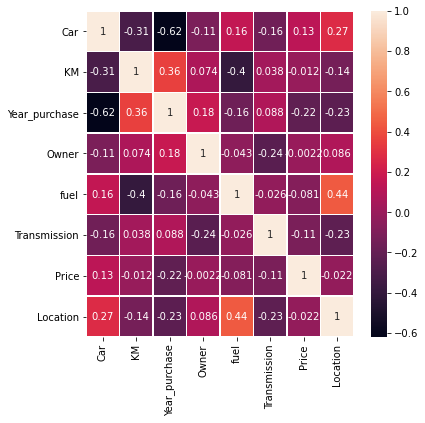

In [307]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(df_encoded.corr(),annot=True, linewidth=0.5,)

no major corelation observed.

In [294]:
x=df_encoded.drop(columns='Price')
y=df_encoded['Price']

In [295]:
print('x:',x.shape)
print('y:',y.shape)

x: (251, 7)
y: (251,)


In [296]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.24594699,  0.1063909 , -0.90779424, ...,  0.91955872,
         0.38907088,  1.05686374],
       [ 0.81861039, -0.36083433, -0.48348073, ...,  0.91955872,
         0.38907088,  1.05686374],
       [ 0.00278597,  1.09744084, -0.05916722, ...,  0.91955872,
         0.38907088,  1.05686374],
       ...,
       [ 0.74091282, -0.38579322, -0.48348073, ..., -1.08747814,
         0.38907088,  0.01657825],
       [-0.40512624, -0.98173873,  0.36514628, ...,  0.91955872,
         0.38907088,  0.01657825],
       [ 0.50782013,  0.04035383, -0.48348073, ..., -1.08747814,
         0.38907088,  0.01657825]])

In [297]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [298]:
#Splitting into train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=45)

In [299]:
from sklearn.model_selection import cross_val_score
ml_models=[LinearRegression(),SVR(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in ml_models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    mse=mean_squared_error(y_test,predm)
    mae=mean_absolute_error(y_test,predm)
    r2=r2_score(y_test,predm)
    print(f'metrics of {m}:')
    print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')
    score=cross_val_score(m,x_scaled,y, cv=5)
    print(' mean cv score:',score.mean())
    print('\n\n')

metrics of LinearRegression():
 mean_absolute_error: 2.6119050862281252
 mean_squared_error: 14.394900456087134
 r2_score: -0.03032565299391332 
 mean cv score: -0.3301251089962346



metrics of SVR():
 mean_absolute_error: 2.3539192326042593
 mean_squared_error: 15.204625144065323
 r2_score: -0.08828229676727362 
 mean cv score: -0.3415959586445788



metrics of RandomForestRegressor():
 mean_absolute_error: 2.62045873015873
 mean_squared_error: 15.230039962380957
 r2_score: -0.09010138119628075 
 mean cv score: -0.4258930446906346



metrics of GradientBoostingRegressor():
 mean_absolute_error: 2.727925781237661
 mean_squared_error: 15.050840824534141
 r2_score: -0.07727507028977554 
 mean cv score: -0.45991147420623346





In [300]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 2.6119050862281252
 mean_squared_error: 14.394900456087134
 r2_score: -0.03032565299391332 


In [301]:
print('Train score:',lr.score(x_train,y_train))
print('Test score:',lr.score(x_test,y_test))

Train score: 0.09906371640203138
Test score: -0.03032565299391332


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

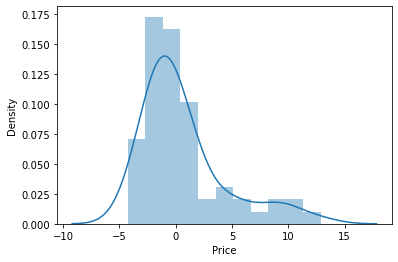

In [302]:
sns.distplot(y_test-pred)

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

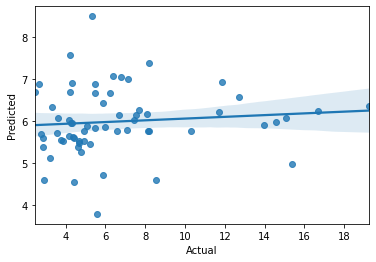

In [303]:
results=pd.DataFrame({'Actual':y_test, 'Predicted':pred})
sns.regplot(x='Actual',y='Predicted',data=results)

In [304]:
results.sample(10)

,Actual,Predicted
201,5.47,6.678572
4,6.22,6.663167
123,2.74,5.699527
203,4.22,6.693762
162,4.68,5.492625
87,19.26,6.358141
175,4.76,5.261933
177,8.09,6.177097
169,2.87,5.601964
38,3.24,5.121539


In [309]:
#Saving the model as obj file
import pickle
file=open('Car price_prediction.pkl','wb')
pickle.dump(lr,file)